# Self Organizing Map

# Install MiniSom Package

In [1]:
!pip install MiniSom

### Importing the libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
dataset=pd.read_csv(r"C:\Users\KUNAL\Documents\Deep_Learning\Unsupervised_learning\Self_Organizing_Maps\Credit_Card_Applications.csv")
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [5]:
#SPLIT THE DATASET
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]

In [6]:
X

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12


In [7]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
685    1
686    0
687    1
688    1
689    1
Name: Class, Length: 690, dtype: int64

## Feature Scaling


In [8]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))# feature values lies btw 0 & 1
X=sc.fit_transform(X)# calling fit_transform method of minmaxscaler class


In [9]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

# Training the SOM


In [25]:
#SOM does't have any libraries in sklearn
#There is a devoloper MINISOM 1.0 is a numpy based implementation of Som
#So here we are using the inbuilt libraries not building our own class & objects
from minisom import MiniSom
# Create an object of this class i.e som which will be trained on x not y
#Hyperparameter of MiniSom:X&Y are dimensions of the som grid,input_len=input features i.e X including both customer & 14
# colums,sigma=radius of different neigbourhood's in the grid,learning_rate=decides by how much the weights are updated
# in each iteration,high learning_rate higher convergence  & low learning_rate the som will take more time to build. 
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
#MiniSom.py file has the method random_weights which initialize the values of weight vector
som.random_weights_init(X)
#Another method i.e to train our som model i.e train_random which takes the data & the no. of iteration
som.train_random(data = X, num_iteration = 100)


# Visualizing the results


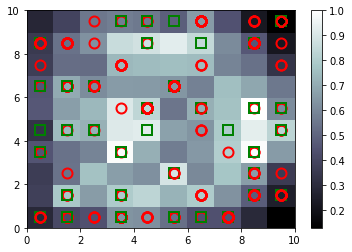

In [26]:
#larger mid closer the wining node color to white
from pylab import bone,pcolor,colorbar,plot,show
bone()# func contains a white window that contains the map
# here we add MID by diff color diff ranges so use pcolor fn-add MID for all wining nodes for this we will use distance_map
# method gives all Mid inform of matrix & then take Transpose
pcolor(som.distance_map().T)
colorbar()# add a legend to know whether white is High Mid or dark colors are high MID 0.2-1 normalised values of MID
#SO for high white & dark is low MID- so for white are outliers so they(outliers|frauds) are far from there 
#neighbourhood wheras dark colors are closer to each other and forms clusters.# here all our wining node but differ's
# on the basis of there MID
#add a marker for customers who were frauds & get approval instead of who were not- for approval } not approval
#RED CIRCLE- not got approval ,Green SQUARE-got approval
markers=['o','s']
colors=['r','g']
#Loop over all customers & for each customer fing the wining node dependant on got approval|not
for i,x in enumerate(X):# i for customer(0-689),X -1 to last customer vector with full customers
    w=som.winner(x)# find first customer wining node|bmu by a method in MiniSom called winner- x customer
    plot(w[0] +  0.5,  # for the first wining node put the color marker on it
         w[1] +  0.5,  # puting this marker on center of wining node 0-X-for horizontal- not got approval circle,1-Y-center-square
         markers[Y[i]],   # tells that the wining node got aprroval or not by Y[i] position:Y[0]-circle,Y[1]-square
         markeredgecolor = colors[Y[i]],# to get colors Markers we can color inside & the edge but we only want the edge
         markerfacecolor = 'None',
         markersize=10,
         markeredgewidth = 2) 
show()    
         
    



## Finding the frauds


In [29]:
# there is no fn to get the fraud customers by inverse map fn 
# method in minisom i.e win_maps returns mapping a dictionary from wining nodes of customers and inside it X 
mappings=som.win_map(X)
mappings

defaultdict(list,
            {(4,
              5): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.81120334, 1.        , 0.17789474, 0.01196429, 0.5       ,
                     0.23076923, 0.875     , 0.12280702, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.17      , 0.        ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
                     0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
                     0.        , 0.        , 0.00298246, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([5.45275078e-01,

In [31]:
# concatenate take 2 arguments the list of arrays and the axis =0-vertical,1-horizontal do 0 as we need to add for all customers
frauds=np.concatenate((mappings[(3,3)],mappings[(8,3)],mappings[(8,5)]),axis=0)# we need to get coordinate of outlining wining nodes white
frauds=sc.inverse_transform(frauds)
frauds

array([[1.5668679e+07, 0.0000000e+00, 4.7420000e+01, 3.0000000e+00,
        2.0000000e+00, 1.4000000e+01, 4.0000000e+00, 1.3875000e+01,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 5.1900000e+02, 1.7050000e+03],
       [1.5682686e+07, 0.0000000e+00, 3.1250000e+01, 3.7500000e+00,
        2.0000000e+00, 1.3000000e+01, 8.0000000e+00, 6.2500000e-01,
        1.0000000e+00, 1.0000000e+00, 9.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.8100000e+02, 1.0000000e+00],
       [1.5636521e+07, 0.0000000e+00, 2.3500000e+01, 9.0000000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 8.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 5.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.2000000e+02, 1.0000000e+00],
       [1.5598614e+07, 0.0000000e+00, 2.3000000e+01, 1.1750000e+01,
        2.0000000e+00, 1.4000000e+01, 8.0000000e+00, 5.0000000e-01,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        2.0000000e+00,

# Printing the Fraud Clients

In [33]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))
# frauds that not got approval & were frauds

Fraud Customer IDs
15668679
15682686
15636521
15598614
15611189
15759387
15712483
15684722
15772329
15734649
15646082
15604536
15635598
15623369
15650591
15633608
15585855
15654859
15723827
15799785
15591360
15589881
15602456
15580579
15568819
